In [14]:
import pandas as pd
df = pd.read_csv("/Users/juanlillo/Downloads/amz_uk_price_prediction_dataset.csv")

In [15]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [16]:
import pandas as pd

# Supongamos que el DataFrame se llama df y contiene las columnas 'category' y 'isBestSeller'
# Crea una crosstab entre categoría de producto y estatus de best-seller
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

# Calcula la proporción de best-sellers en cada categoría
crosstab['bestseller_proportion'] = crosstab[True] / (crosstab[True] + crosstab[False])

# Ordenar las categorías según la proporción de best-sellers en orden descendente
crosstab.sort_values(by='bestseller_proportion', ascending=False, inplace=True)

crosstab

isBestSeller,False,True,bestseller_proportion
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
...,...,...,...
"CD, Disc & Tape Players",8798,0,0.000000
General Music-Making Accessories,259,0,0.000000
Snowboard Boots,1449,0,0.000000


In [20]:
import pandas as pd
from scipy.stats import chi2_contingency

# Supongamos que ya tienes el crosstab creado como en el paso anterior
crosstab_chi2 = pd.crosstab(df['category'], df['isBestSeller'])

# Realizar la prueba de Chi-cuadrado
chi2_stat, p_value, dof, expected = chi2_contingency(crosstab_chi2)

print("Chi-cuadrado estadístico:", chi2_stat)
print("Valor p:", p_value)
print("Grados de libertad:", dof)
print("Tabla esperada de frecuencia:\n", expected)

Chi-cuadrado estadístico: 36540.20270061387
Valor p: 0.0
Grados de libertad: 295
Tabla esperada de frecuencia:
 [[2.47190130e+02 8.09870149e-01]
 [4.05371878e+03 1.32812173e+01]
 [2.49183599e+02 8.16401360e-01]
 [1.69145827e+03 5.54173243e+00]
 [2.53170536e+02 8.29463782e-01]
 [8.50214439e+03 2.78556144e+01]
 [1.06650580e+02 3.49419782e-01]
 [2.57157474e+02 8.42526204e-01]
 [9.51781673e+03 3.11832664e+01]
 [1.50008526e+04 4.91473619e+01]
 [9.32544700e+03 3.05530045e+01]
 [2.38219520e+02 7.80479700e-01]
 [3.22941944e+03 1.05805616e+01]
 [9.44704859e+03 3.09514084e+01]
 [6.68808779e+03 2.19122125e+01]
 [5.26275760e+02 1.72423967e+00]
 [1.90296531e+04 6.23469391e+01]
 [2.77191835e+03 9.08164873e+00]
 [2.53170536e+02 8.29463782e-01]
 [4.04674164e+02 1.32583581e+00]
 [1.92489346e+04 6.30653723e+01]
 [3.10482764e+03 1.01723609e+01]
 [2.04330551e+02 6.69449115e-01]
 [6.28839730e+03 2.06027047e+01]
 [5.23385231e+03 1.71476942e+01]
 [9.52180367e+03 3.11963288e+01]
 [2.48186864e+02 8.13135755e-0

In [22]:
import numpy as np

# Calcular Cramér's V
n = crosstab_chi2.sum().sum()  # Número total de observaciones
cramers_v = np.sqrt(chi2_stat / (n * (min(crosstab_chi2.shape) - 1)))

print("Cramér's V:", cramers_v)

Cramér's V: 0.1222829439760564


In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear crosstab si aún no lo has hecho
crosstab_plot = pd.crosstab(df['category'], df['isBestSeller'])
crosstab_plot

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [26]:
#PART 2:
import pandas as pd

# Assuming df is your dataframe and 'price' is the column with prices
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Filter to remove outliers
df_filtered = df[(df['price'] >= Q1 - 1.5 * IQR) & (df['price'] <= Q3 + 1.5 * IQR)]
df_filtered

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


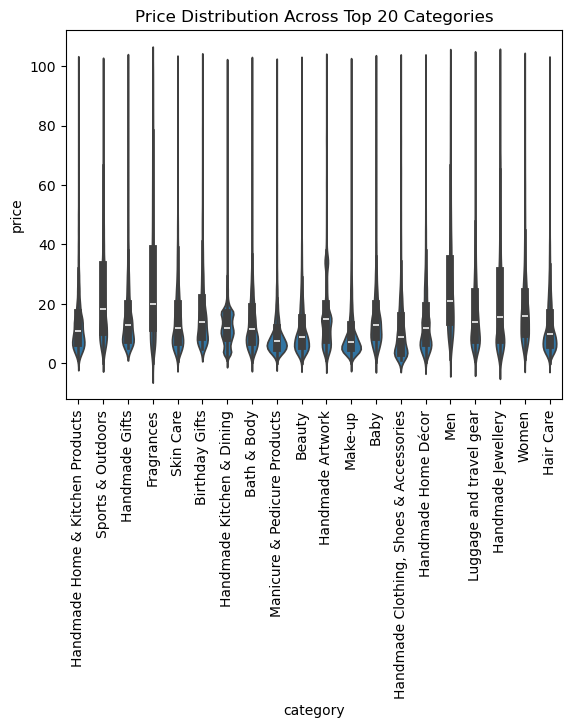

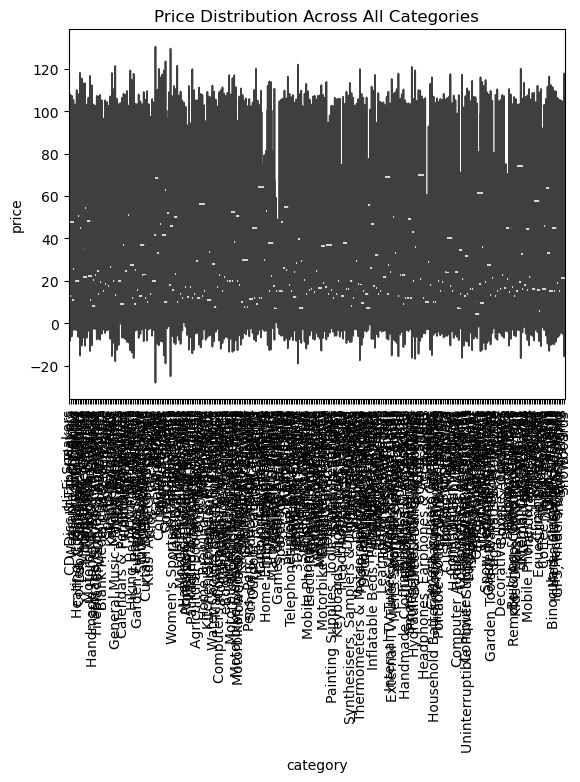

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_filtered is the dataframe without outliers
top_20_categories = df_filtered['category'].value_counts().head(20).index
df_top_20 = df_filtered[df_filtered['category'].isin(top_20_categories)]

sns.violinplot(x='category', y='price', data=df_top_20)
plt.xticks(rotation=90)
plt.title('Price Distribution Across Top 20 Categories')
plt.show()

# Now, create the plot with all categories to determine the highest median price
sns.violinplot(x='category', y='price', data=df_filtered)
plt.xticks(rotation=90)
plt.title('Price Distribution Across All Categories')
plt.show()

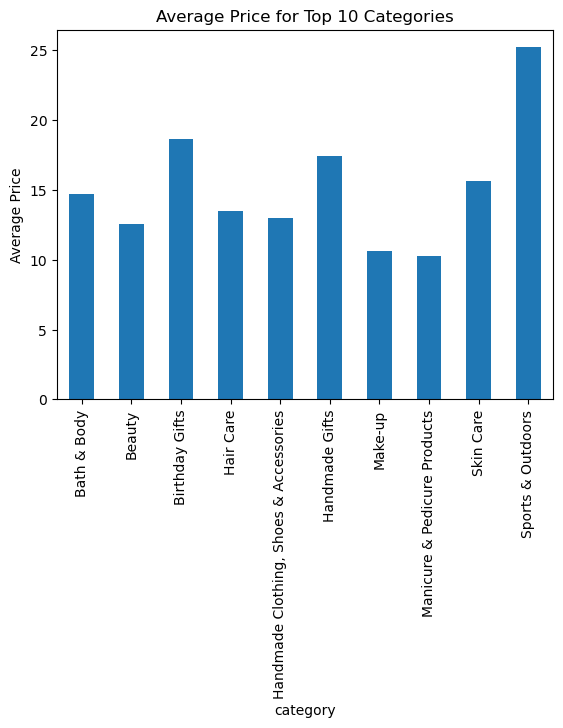

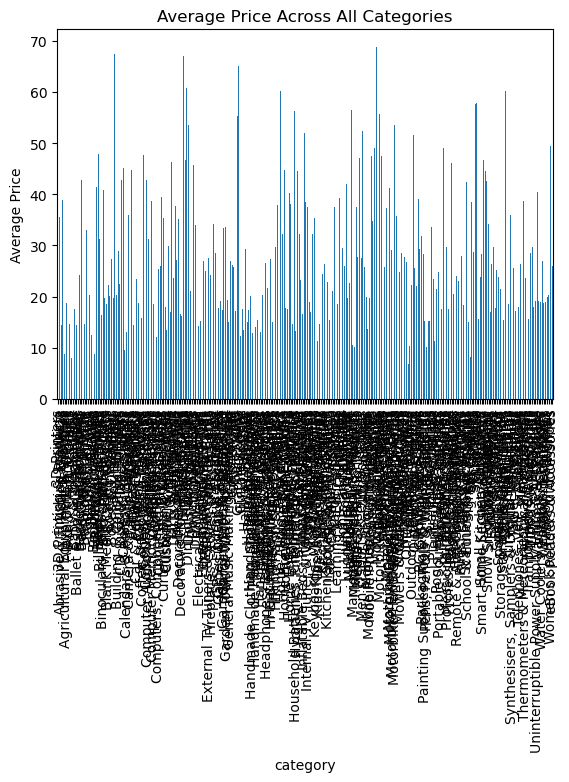

In [34]:
top_10_categories = df_filtered['category'].value_counts().head(10).index
avg_prices = df_filtered[df_filtered['category'].isin(top_10_categories)].groupby('category')['price'].mean()

avg_prices.plot(kind='bar', title='Average Price for Top 10 Categories')
plt.ylabel('Average Price')
plt.show()

# Plot for all categories to determine the highest
all_avg_prices = df_filtered.groupby('category')['price'].mean()
all_avg_prices.plot(kind='bar')
plt.title('Average Price Across All Categories')
plt.ylabel('Average Price')
plt.show()

In [42]:
print(df_top_20.columns)

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')


In [44]:
print(df_top_20.head())

         uid        asin                                              title  \
19513  21072  B09477KHQ3  Personalised Birthday Print Gift "THE YEAR YOU...   
19514  21073  B0BSRFQYG8  Wax Melts 4 Bars | Build Your Own Box (Choose ...   
19515  21074  B09N9GVHV9  Personalised Birthday Print Gift "ON THE DAY/Y...   
19516  21075  B0BRYGV7PQ  Fresh Wax Melts - Laundry Type Wax Melts - Str...   
19517  21076  B0B1JHB28R  Manta Makes Work Leaving Gifts | I Used to Wor...   

       stars  reviews  price  isBestSeller  boughtInLastMonth  \
19513    4.5      763   7.99         False                900   
19514    3.9      117   6.49          True                800   
19515    4.6     1155   8.99          True                600   
19516    4.5       56   4.99          True                500   
19517    4.7      261   9.95          True                400   

                               category  
19513  Handmade Home & Kitchen Products  
19514  Handmade Home & Kitchen Products  
19515  H

In [46]:
print(df_filtered.columns)

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')


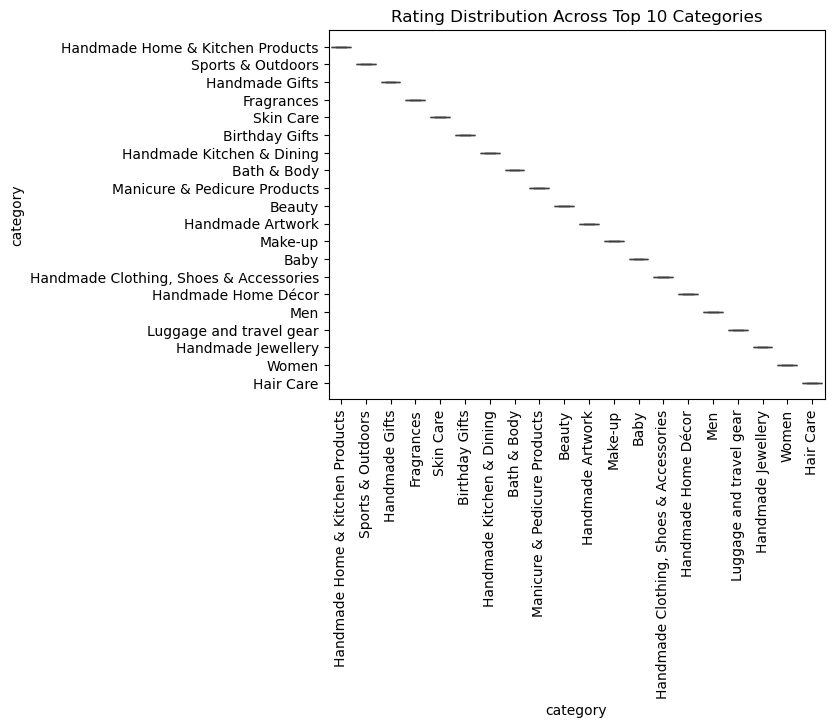

ValueError: Could not interpret value `rating` for `y`. An entry with this name does not appear in `data`.

In [48]:
# Visualizing ratings
sns.boxplot(x='category', y='category', data=df_top_20)
plt.xticks(rotation=90)
plt.title('Rating Distribution Across Top 10 Categories')
plt.show()

# Now, create the plot with all categories to determine the highest median rating
sns.boxplot(x='category', y='rating', data=df_filtered)
plt.xticks(rotation=90)
plt.title('Rating Distribution Across All Categories')
plt.show()

In [ ]:
PART 3: 

In [52]:
import pandas as pd

# Assume df is your DataFrame with 'price' and 'rating' columns
correlation = df[['price', 'rating']].corr()
print(correlation)

KeyError: "['rating'] not in index"

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='rating', data=df)
plt.title('Scatter Plot of Product Rating vs Price')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

ValueError: Could not interpret value `rating` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [56]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numerical Variables')
plt.show()

ValueError: could not convert string to float: 'B09B96TG33'

<Figure size 1000x800 with 0 Axes>

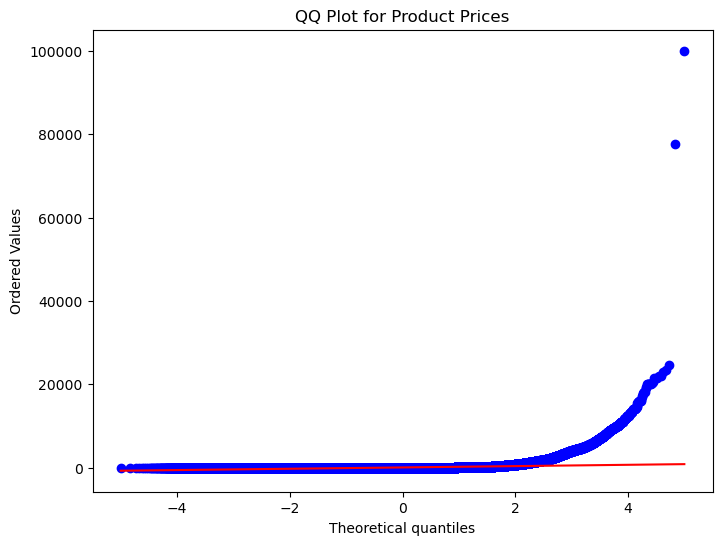

In [58]:
import scipy.stats as stats

plt.figure(figsize=(8, 6))
stats.probplot(df['price'], dist="norm", plot=plt)
plt.title('QQ Plot for Product Prices')
plt.show()